In [32]:
import numpy as np

In [33]:
all_participants = np.load('../datasets/topicos_cc/s_t_features.npy')
all_participants.shape

(10, 792, 40)

In [34]:
participant = all_participants[9]
participant.shape

(792, 40)

In [35]:
X = participant
pattern = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.repeat(pattern, 99, axis=None)
y = np.array(y).flatten()

np.save('../datasets/topicos_cc/X.npy', X)
np.save('../datasets/topicos_cc/y.npy', y)

X.shape, y.shape

((792, 40), (792,))

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
def plotPcaScatter(X):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Configuração do tamanho do gráfico scatterplot 
    axs[0, 0].remove()  # remove o subplot em [0, 0]
    axs[0, 1].remove()  # remove o subplot em [0, 1]
    ax1 = fig.add_subplot(2, 1, 1)  # adiciona um subplot maior no topo

    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', ax=ax1)
    ax1.set_title('Scatter plot of the 2 principal components')

    axs[1, 0].bar(np.arange(1, X.shape[1] + 1), pca.components_[0])
    axs[1, 0].set_xlabel('Features')
    axs[1, 0].set_ylabel('Loading no Primeiro Componente Principal')
    axs[1, 0].set_title('PCA 1')

    axs[1, 1].bar(np.arange(1, X.shape[1] + 1), pca.components_[1])
    axs[1, 1].set_xlabel('Features')
    axs[1, 1].set_ylabel('Loading no Segundo Componente Principal')
    axs[1, 1].set_title('PCA 2')

    plt.tight_layout()
    plt.show()


In [47]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k=8)
# selector = SelectPercentile(score_func=f_classif, percentile=50)
# selector = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=8)
fit = selector.fit(X, y)

X_selected_features = fit.transform(X)

X_selected_features.shape

(792, 8)

Original features:  40


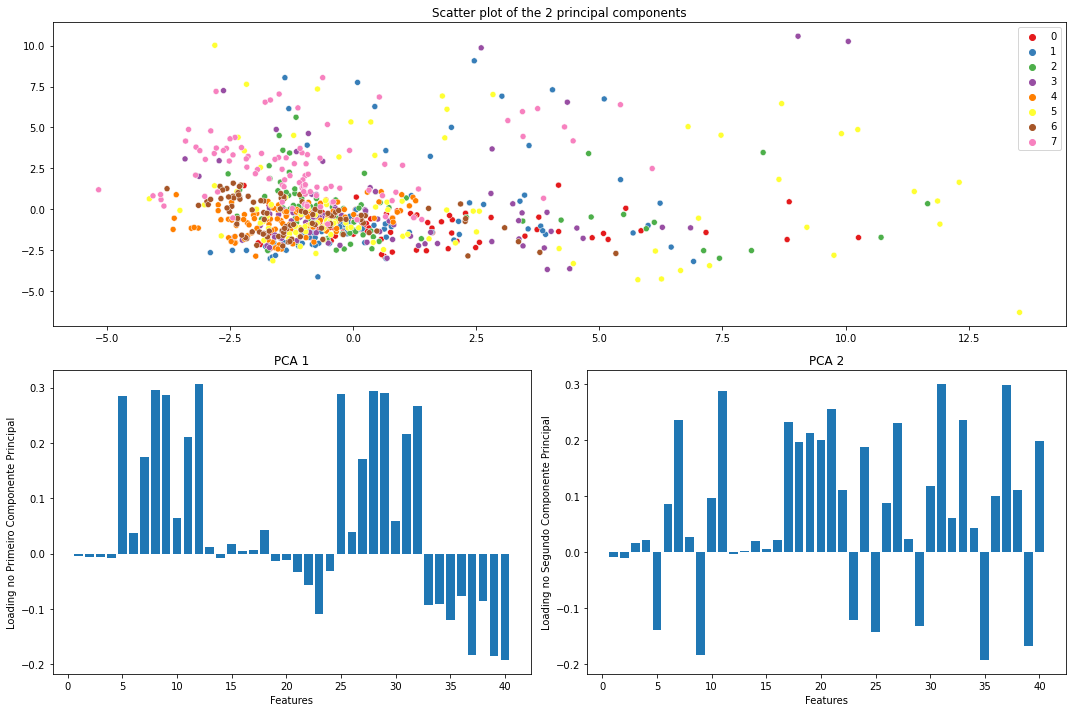

Selected features:  8


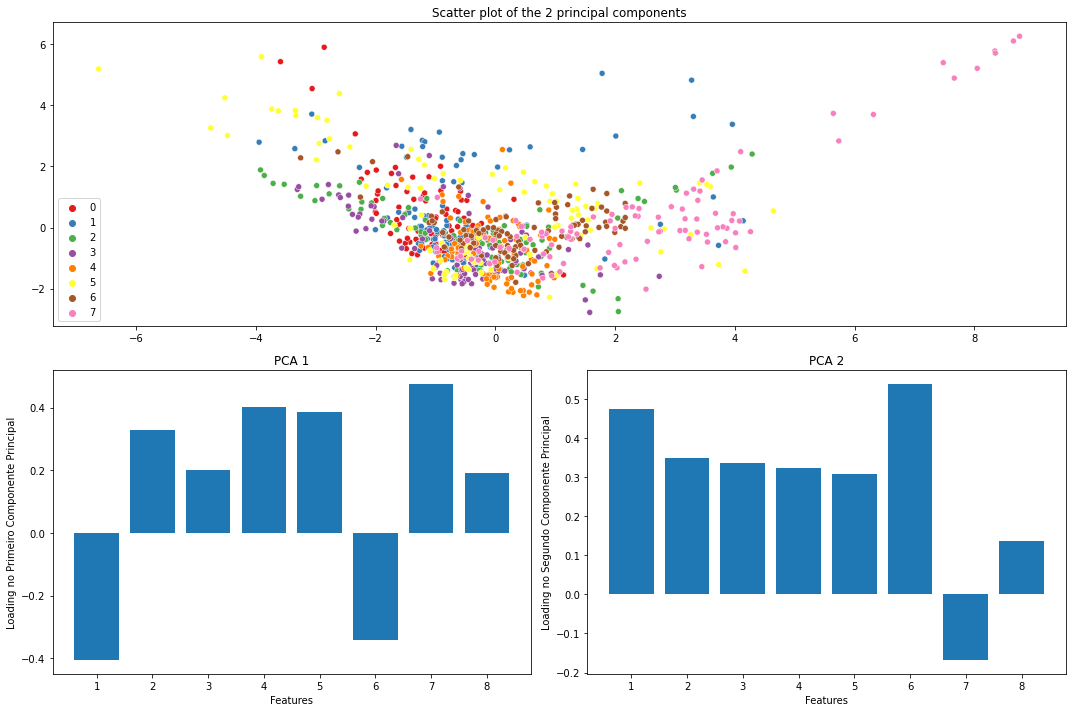

In [39]:
print('Original features: ', X.shape[1])
plotPcaScatter(X)

print('Selected features: ', X_selected_features.shape[1])
plotPcaScatter(X_selected_features)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.3, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((554, 8), (238, 8), (554,), (238,))

In [41]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [42]:
from sklearn.metrics import classification_report

res = clf.predict(X_test)

print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63        33
           1       0.91      0.84      0.87        37
           2       0.41      0.33      0.37        27
           3       0.57      0.45      0.50        29
           4       0.43      0.67      0.52        24
           5       0.83      0.59      0.69        34
           6       0.63      0.68      0.66        28
           7       0.82      0.69      0.75        26

    accuracy                           0.63       238
   macro avg       0.64      0.63      0.62       238
weighted avg       0.66      0.63      0.64       238



In [43]:
from sklearn.model_selection import GridSearchCV

def optimize_svm_hyperparameters(X_train, y_train, n_jobs=-1):
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}

    grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)

    return grid_search


In [44]:
grid_search = optimize_svm_hyperparameters(X_train, y_train)
print("Melhores parâmetros: ", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores parâmetros:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
res = grid_search.predict(X_test)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        33
           1       0.97      0.84      0.90        37
           2       0.53      0.63      0.58        27
           3       0.71      0.52      0.60        29
           4       0.47      0.67      0.55        24
           5       0.89      0.74      0.81        34
           6       0.76      0.68      0.72        28
           7       0.87      0.77      0.82        26

    accuracy                           0.73       238
   macro avg       0.74      0.72      0.72       238
weighted avg       0.75      0.73      0.73       238

